In [57]:
%matplotlib notebook
# starter code
from tqdm import tqdm
import networkx as nx
from graph_tool.all import load_graph, shortest_distance
from networkx.drawing.nx_agraph import graphviz_layout

from ic import simulate_cascade, observe_cascade, get_gvs, get_o2src_time, get_infection_time, gen_nontrivial_cascade
from utils import get_rank_index

gtype = 'grid'
g = load_graph('data/{}/2-6/graph.gt'.format(gtype))
gnx = nx.read_graphml('data/{}/2-6/graph.graphml'.format(gtype))
gnx = nx.relabel_nodes(gnx, {i: int(i) for i in gnx.nodes_iter()})
N1, N2 = 100, 100
p, q = 0.5, 0.2

gvs = get_gvs(g, p, N2)
pos = graphviz_layout(gnx, root=0)

In [58]:
import random
seed = 12345
random.seed(seed)
np.random.seed(seed)

In [59]:
from mwu import mwu
infection_times, source, obs_nodes = gen_nontrivial_cascade(
    g, p, q)
print('cascade size {}'.format(len(obs_nodes)))
r, q_log, mu_log, is_nbr_log = mwu(g, gvs,
        source, obs_nodes, infection_times, o2src_time=None,
        active_method='max_mu',
        reward_method='dist',
        eps=0.2,
        use_uninfected=True,
        debug=True, save_log=True)

 33%|███▎      | 1/3 [00:00<00:00,  6.80it/s]

cascade size 3


100%|██████████| 3/3 [00:00<00:00,  7.66it/s]
3it [00:00, 1120.17it/s]


t1=2, t2=1
source reward: 0.94
t1=2, t2=3
source reward: 0.95
t1=1, t2=3
source reward: 0.94
query 61
using pairs to update sll
source reward (without smoothing): 0.91
max reward: 0.976663961038961
new sll[source] = 0.022916606135354
source reward (without smoothing): 0.80
max reward: 0.9888074888074888
new sll[source] = 0.02099925503021256
source reward (without smoothing): 0.91
max reward: 1.0
new sll[source] = 0.022448177448216734
add q to ref_nodes (#nodes=4)
source current rank = 10, 0.02245
using node from nodes_to_use
0 is uninfected
source current rank = 4, 0.02509
using node from nodes_to_use
15 is uninfected
source current rank = 1, 0.02785
checking source 53 with winner 63
winner's time 3
winner's nbr infection time [4, 2]
using node from nodes_to_use
using pairs to update sll
source reward (without smoothing): 0.96
max reward: 0.9939880410763031
new sll[source] = 0.03379819340034007
source reward (without smoothing): 0.85
max reward: 0.9975268817204301
new sll[source] = 0.0

In [65]:
bad_examples = []
counts = []
for i in tqdm(range(100)):
    infection_times, source, obs_nodes = gen_nontrivial_cascade(
        g, p, q)
    c = mwu(g, gvs,
            source, obs_nodes, infection_times, o2src_time=None,
            active_method='max_mu',
            reward_method='dist',
            eps=0.2,
            use_uninfected=True,
            debug=False, save_log=False)
    if c > 60:
        bad_examples.append((infection_times, source, obs_nodes))
    counts.append(c)

  2%|▏         | 2/100 [00:02<02:03,  1.26s/it]/home/cloud-user/code/source_finding/rewards.py:29: RuntimeWarning: invalid value encountered in true_divide
  / (np.absolute(len1 + len2)))
  3%|▎         | 3/100 [00:10<05:21,  3.32s/it]

no more nodes to query


  6%|▌         | 6/100 [00:19<05:41,  3.63s/it]

no more nodes to query


  7%|▋         | 7/100 [00:20<04:16,  2.76s/it]/home/cloud-user/code/source_finding/rewards.py:22: RuntimeWarning: invalid value encountered in true_divide
  / counts)
  8%|▊         | 8/100 [00:27<05:59,  3.91s/it]

no more nodes to query


 10%|█         | 10/100 [00:34<06:13,  4.15s/it]

no more nodes to query


 11%|█         | 11/100 [00:42<07:37,  5.14s/it]

no more nodes to query


 12%|█▏        | 12/100 [00:49<08:32,  5.82s/it]

no more nodes to query


 14%|█▍        | 14/100 [00:58<07:43,  5.39s/it]

no more nodes to query


 15%|█▌        | 15/100 [01:06<08:39,  6.11s/it]

no more nodes to query


 17%|█▋        | 17/100 [01:14<07:27,  5.40s/it]

no more nodes to query


 25%|██▌       | 25/100 [01:28<03:50,  3.08s/it]

no more nodes to query


 26%|██▌       | 26/100 [01:36<05:23,  4.37s/it]

no more nodes to query


 30%|███       | 30/100 [01:46<04:18,  3.69s/it]

no more nodes to query


 31%|███       | 31/100 [01:53<05:33,  4.83s/it]

no more nodes to query


 32%|███▏      | 32/100 [02:01<06:30,  5.74s/it]

no more nodes to query


 34%|███▍      | 34/100 [02:10<05:55,  5.39s/it]

no more nodes to query


 37%|███▋      | 37/100 [02:19<04:32,  4.32s/it]

no more nodes to query


 40%|████      | 40/100 [02:27<03:45,  3.76s/it]

no more nodes to query


 41%|████      | 41/100 [02:34<04:34,  4.66s/it]

no more nodes to query


 44%|████▍     | 44/100 [02:43<03:55,  4.20s/it]

no more nodes to query


 51%|█████     | 51/100 [02:57<02:31,  3.10s/it]

no more nodes to query


 53%|█████▎    | 53/100 [03:05<03:02,  3.89s/it]

no more nodes to query


 56%|█████▌    | 56/100 [03:13<02:37,  3.59s/it]

no more nodes to query


 57%|█████▋    | 57/100 [03:20<03:19,  4.63s/it]

no more nodes to query


 59%|█████▉    | 59/100 [03:28<03:06,  4.55s/it]

no more nodes to query


 61%|██████    | 61/100 [03:36<02:56,  4.53s/it]

no more nodes to query


 63%|██████▎   | 63/100 [03:45<02:54,  4.70s/it]

no more nodes to query


 65%|██████▌   | 65/100 [03:52<02:35,  4.43s/it]

no more nodes to query


 66%|██████▌   | 66/100 [03:59<02:58,  5.26s/it]

no more nodes to query


 67%|██████▋   | 67/100 [04:06<03:11,  5.79s/it]

no more nodes to query


 69%|██████▉   | 69/100 [04:14<02:35,  5.01s/it]

no more nodes to query


 74%|███████▍  | 74/100 [04:25<01:31,  3.54s/it]

no more nodes to query


 84%|████████▍ | 84/100 [04:41<00:43,  2.73s/it]

no more nodes to query


 91%|█████████ | 91/100 [04:53<00:26,  2.92s/it]

no more nodes to query


 92%|█████████▏| 92/100 [05:01<00:34,  4.27s/it]

no more nodes to query


 97%|█████████▋| 97/100 [05:17<00:13,  4.38s/it]

no more nodes to query


 99%|█████████▉| 99/100 [05:25<00:04,  4.54s/it]

no more nodes to query


100%|██████████| 100/100 [05:27<00:00,  3.55s/it]


In [61]:
infection_times, source, obs_nodes = bad_examples[0]
r, q_log, mu_log, is_nbr_log = mwu(g, gvs,
        source, obs_nodes, infection_times, o2src_time=None,
        active_method='max_mu',
        reward_method='dist',
        eps=0.2,
        use_uninfected=True,
        debug=True, save_log=True)

100%|██████████| 2/2 [00:00<00:00, 11.18it/s]
1it [00:00, 1144.73it/s]


t1=2, t2=3
source reward: 0.96
query 1
1 is uninfected
source current rank = 16, 0.01778
using node from nodes_to_use
55 is uninfected
source current rank = 32, 0.01593
using node from nodes_to_use
57 is uninfected
source current rank = 21, 0.01727
using node from nodes_to_use
15 is uninfected
source current rank = 23, 0.01696
using node from nodes_to_use
24 is uninfected
source current rank = 17, 0.01828
using node from nodes_to_use
33 is uninfected
source current rank = 16, 0.01879
using node from nodes_to_use
40 is uninfected
source current rank = 17, 0.01916
using node from nodes_to_use
6 is uninfected
source current rank = 17, 0.01952
using node from nodes_to_use
48 is uninfected
source current rank = 16, 0.02069
using node from nodes_to_use
62 is uninfected
source current rank = 17, 0.02006
using node from nodes_to_use
8 is uninfected
source current rank = 14, 0.02116
query 63
63 is uninfected
source current rank = 15, 0.02047
query 0
0 is uninfected
source current rank = 14, 0.0

/home/cloud-user/code/source_finding/rewards.py:29: RuntimeWarning: invalid value encountered in true_divide
  / (np.absolute(len1 + len2)))


source current rank = 37, 0.00000
query 22
22 is uninfected
source current rank = 37, 0.00000
query 33
33 is uninfected
source current rank = 36, 0.00000
query 12
12 is uninfected
source current rank = 35, 0.00000
query 19
19 is uninfected
source current rank = 33, 0.00000
query 51
51 is uninfected
source current rank = 34, 0.00000
query 21
21 is uninfected
source current rank = 33, 0.00000
query 26
26 is uninfected
source current rank = 33, 0.00000
query 45
using pairs to update sll
source reward (without smoothing): 0.85
max reward: 1.0
new sll[source] = 1.9299563144686224e-07
source reward (without smoothing): 1.00
max reward: 1.0
new sll[source] = 1.9971744636939508e-07
source reward (without smoothing): 0.74
max reward: 1.0
new sll[source] = 1.6988800404734057e-07
source reward (without smoothing): 0.81
max reward: 0.9955578512396694
new sll[source] = 1.5864985356353086e-07
source reward (without smoothing): 0.99
max reward: 1.0
new sll[source] = 1.6290870586004005e-07
source rewa

<IPython.core.display.Javascript object>


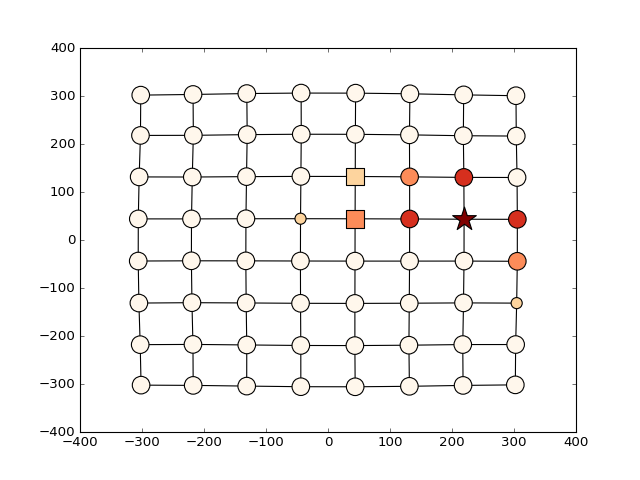

In [62]:
from plot_utils import plot_snapshot
infection_times, source, obs_nodes = bad_examples[0]
plot_snapshot(gnx, pos, infection_times, queried_nodes=obs_nodes, source_node=source)

In [66]:
from experiment_utils import counts_to_stat
counts_to_stat(counts)

count    100.000000
mean      27.090000
std       24.784768
min        3.000000
25%        7.000000
50%       11.000000
75%       57.250000
max       63.000000
dtype: float64

In [64]:
infection_times[q_log]

PropertyArray([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 3, 4, 4, 4, 4, 0,
       2, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       2, 4, 4, 4, 4, 4, 4, 4, 4, 1, 3, 3, 2, 1], dtype=int32)